In [ ]:
import pandas as pd
from google.colab import files

# List all sheet names
sheet_names = xls.sheet_names
sheet_names


['2017', '2018', '2019', '2020', '2023']

In [ ]:
# Define a cleaning function
def clean_market_data(df, year):
    df.columns = df.columns.str.strip()
    df['Year'] = year

    # Standardize column names (some years may have slight variations)
    col_map = {
        'Accepts EBT': 'Accepts EBT',
        'Open Year-Round': 'Open Year-Round',
        'Borough': 'Borough',
        'Latitude': 'Latitude',
        'Longitude': 'Longitude'
    }
    df = df.rename(columns=lambda x: x.strip())
    for col in col_map.values():
        if col not in df.columns:
            df[col] = None

    # Normalize boolean fields
    df['EBT_Flag'] = df['Accepts EBT'].str.lower().str.strip() == 'yes'
    df['YearRound_Flag'] = df['Open Year-Round'].str.lower().str.strip() == 'yes'

    # Clean Borough names
    df['Borough'] = df['Borough'].str.strip().str.title()

    return df

# Load and clean all sheets
all_years_data = []
for year in ['2017', '2018', '2019', '2020', '2023']:
    df_year = xls.parse(year)
    cleaned_df = clean_market_data(df_year, int(year))
    all_years_data.append(cleaned_df)

# Combine into a single DataFrame
combined_df = pd.concat(all_years_data, ignore_index=True)

# Preview cleaned and combined data
combined_df.head()


,Farmers Market,Borough,Address,Community District,Latitude,Longitude,Days of Operation,Hours of Operations,Season Dates,Accepts EBT,...,EBT_Flag,YearRound_Flag,Market Name,Street Address,Season Begin,Season End,Distributes Health Bucks?,Cooking Demonstrations,Location Point,Zip Code
0,170 Farm Stand,Bronx,170th St and Townsend Ave,204.0,-73.916827,40.840095,Wednesday,2:30pm-6:30pm,7/5/2017-11/22/2017,Yes,...,True,False,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1,Bissel Gardens Farmers' Market,Bronx,Baychester Ave & E 241st St,212.0,-73.846939,40.901528,Wednesday & Saturday,9am-5pm,7/9/2016-11/19/2016,Yes,...,True,False,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
2,Bronx Borough Hall Greenmarket,Bronx,Grand Concourse bet. 161st St. & 162nd St.,204.0,-73.922234,40.82773,Tuesday,8am-4pm,6/6/2017 -11/28/2017,Yes,...,True,False,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
3,Fordham Plaza Greenmarket,Bronx,Fordham Plaza - Park Ave. btw 189th St. and E ...,206.0,-73.891224,40.860343,Wednesday,8am-4pm,6/7/2017-12/20/2017,Yes,...,True,False,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
4,Friends of Van Cortlandt Park Amalgamated Hous...,Bronx,Orloff Ave & Gale Pl,208.0,-73.890108,40.882682,Wednesday,2pm-7pm,7/12/2017-11/1/2017,Yes,...,True,False,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN


<Figure size 1200x500 with 0 Axes>

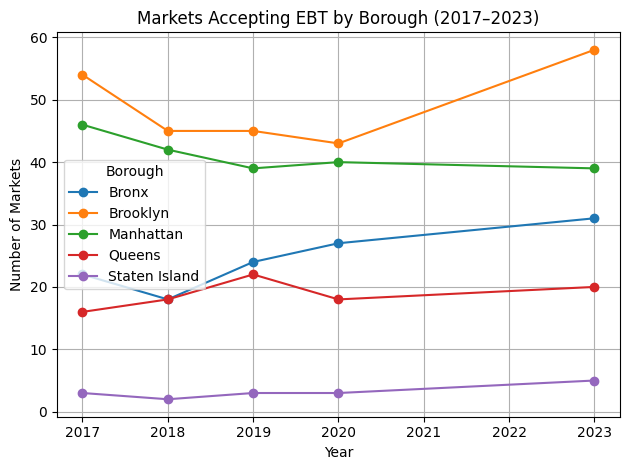

<Figure size 1200x500 with 0 Axes>

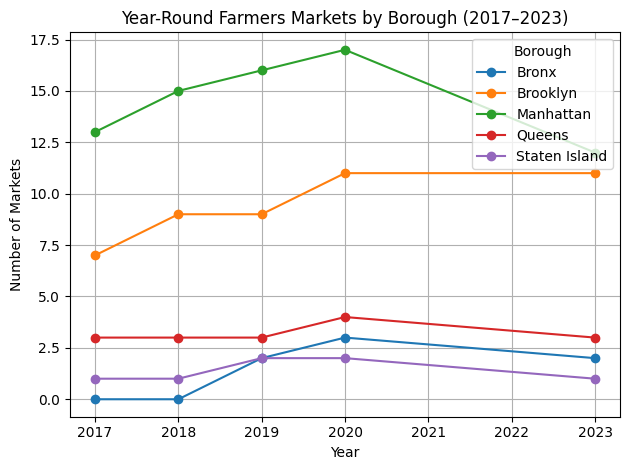

In [ ]:
# Group by Year and Borough, then sum EBT and YearRound flags
year_borough_summary = combined_df.groupby(['Year', 'Borough'])[['EBT_Flag', 'YearRound_Flag']].sum().reset_index()

# Pivot the data to plot
ebt_pivot = year_borough_summary.pivot(index='Year', columns='Borough', values='EBT_Flag')
yearround_pivot = year_borough_summary.pivot(index='Year', columns='Borough', values='YearRound_Flag')

# Plot EBT acceptance over years by borough
plt.figure(figsize=(12, 5))
ebt_pivot.plot(marker='o')
plt.title('Markets Accepting EBT by Borough (2017–2023)')
plt.ylabel('Number of Markets')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Year-Round markets over years by borough
plt.figure(figsize=(12, 5))
yearround_pivot.plot(marker='o')
plt.title('Year-Round Farmers Markets by Borough (2017–2023)')
plt.ylabel('Number of Markets')
plt.grid(True)
plt.tight_layout()
plt.show()


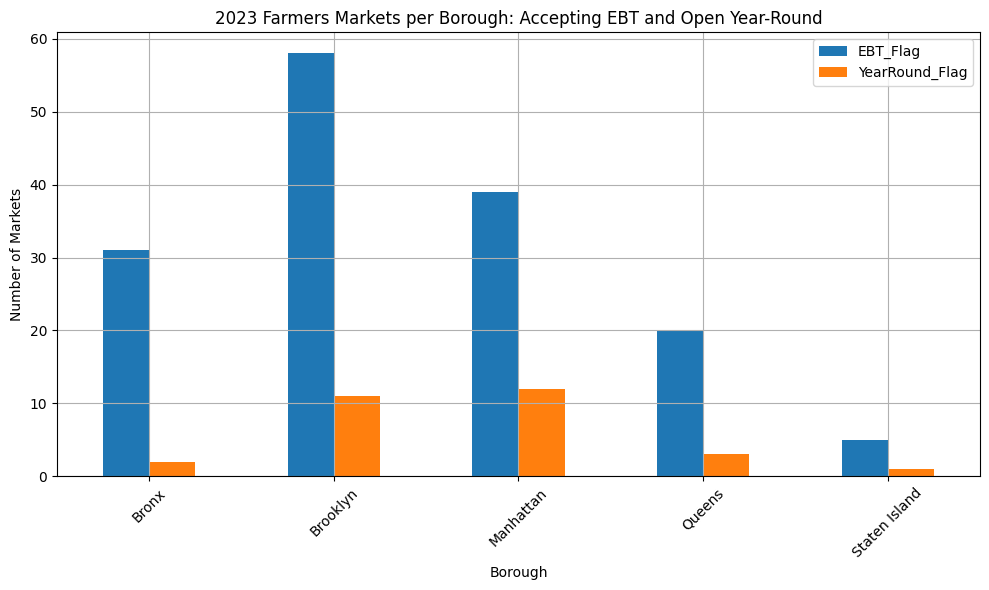

In [ ]:
# Filter only 2023 data
df_2023 = combined_df[combined_df['Year'] == 2023]

# Group by Borough, summing EBT and YearRound flags
summary_2023 = df_2023.groupby('Borough')[['EBT_Flag', 'YearRound_Flag']].sum().astype(int)

# Plot
summary_2023.plot(kind='bar', figsize=(10, 6))
plt.title('2023 Farmers Markets per Borough: Accepting EBT and Open Year-Round')
plt.ylabel('Number of Markets')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


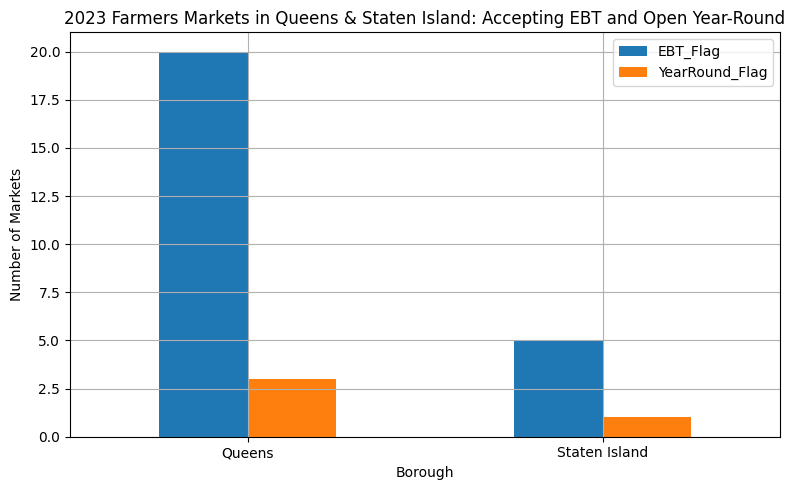

In [ ]:
# Filter 2023 data for Queens and Staten Island only
df_2023_filtered = df_2023[df_2023['Borough'].isin(['Queens', 'Staten Island'])]

# Group and summarize
summary_qs = df_2023_filtered.groupby('Borough')[['EBT_Flag', 'YearRound_Flag']].sum().astype(int)

# Plot
summary_qs.plot(kind='bar', figsize=(8, 5))
plt.title('2023 Farmers Markets in Queens & Staten Island: Accepting EBT and Open Year-Round')
plt.ylabel('Number of Markets')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()
